<a href="https://colab.research.google.com/github/pbdanny/colab/blob/main/ps_matching/PS_matching_ECLS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis from Netflix staff tutorial

Source : https://simonejdemyr.com/r-tutorials/statistics/tutorial8.html  
**Could not use this article data source**  
effect of going to Catholic school, as opposed to public school, on student achievement. Because students who attend Catholic school on average are different from students who attend public school, we will use propensity score matching to get more credible causal estimates of Catholic schooling.

Source 2 : https://rpubs.com/metricsdawg/1037525  

Data source ; smaller data size & difference result from above

In [ ]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [ ]:
ecls <- read_csv("http://www.mfilipski.com/files/ecls.csv")

Rows: 5429 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): childid, race, w3daded, w3momed, w3inccat
dbl (18): catholic, race_white, race_black, race_hispanic, race_asian, p5num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## 1) Pre-analysis

### 1.1) Difference in Mean: outcome variable

In [ ]:
ecls %>%
  group_by(catholic) %>%
  summarise(n_students = n(),
            mean_math = mean(c5r2mtsc_std), # std test score.
            std_error = sd(c5r2mtsc_std)/sqrt(n_students))

catholic,n_students,mean_math,std_error
<dbl>,<int>,<dbl>,<dbl>
0,4499,0.1631279,0.01451663
1,930,0.2196851,0.02813170


In [ ]:
ecls %>%
  group_by(catholic) %>%
  summarise_at(vars(c5r2mtsc_std), list(min = min, mean = mean, max = max))

catholic,min,mean,max
<dbl>,<dbl>,<dbl>,<dbl>
0,-3.103553,0.1631279,3.433658
1,-2.592234,0.2196851,3.055238


In [ ]:
# The c5r2mtsc_std, came from bigger data
# Then the std value differ from directly calcuate from data

ecls %>%
  mutate(test =  (c5r2mtsc - mean(c5r2mtsc))/sd(c5r2mtsc)) %>%
  group_by(catholic) %>%
  summarise(mean_math = mean(test))

catholic,mean_math
<dbl>,<dbl>
0,-0.01014466
1,0.04907616


In [ ]:
ecls %>%
  mutate(test = scale(c5r2mtsc)) %>%
  group_by(catholic) %>%
  summarise(mean_math = mean(test))

catholic,mean_math
<dbl>,<dbl>
0,-0.01014466
1,0.04907616


In [ ]:
# confidence difference in mean, before pre-treatment covariate
t.test(c5r2mtsc_std ~ catholic, data = ecls)


	Welch Two Sample t-test

data:  c5r2mtsc_std by catholic
t = -1.7866, df = 1468.1, p-value = 0.07421
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.118653665  0.005539377
sample estimates:
mean in group 0 mean in group 1 
      0.1631279       0.2196851 


The difference in mean between each group not statistically difference, with confidence interval having 0 in the range

### 1.2) Difference-in-mean : pre-treatment covariate

In [ ]:
ecls_cov = c("race_white", "p5hmage", "w3income", "p5numpla", "w3momed_hsb")
ecls %>%
  group_by(catholic) %>%
  select(one_of(ecls_cov)) %>%
  summarise_all( list(~ mean(., na.rm=T)) )

Adding missing grouping variables: `catholic`


catholic,race_white,p5hmage,w3income,p5numpla,w3momed_hsb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.6537008,37.79462,65393.93,1.106246,0.3923094
1,0.7666667,39.77527,86180.63,1.073118,0.2053763


In [ ]:
# t-test of difference in mean by each covariates
test_each_fn <- function(v) {
    t.test(ecls[, v] ~ ecls[, "catholic"])
}

apply(ecls_cov, test_each_fn)

ERROR: ignored

In [ ]:
t.test(race_white ~ catholic, data = ecls)


	Welch Two Sample t-test

data:  race_white by catholic
t = -7.2484, df = 1457.5, p-value = 6.814e-13
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.14353706 -0.08239463
sample estimates:
mean in group 0 mean in group 1 
      0.6537008       0.7666667 


In [ ]:
t.test(p5hmage ~ catholic, data = ecls)


	Welch Two Sample t-test

data:  p5hmage by catholic
t = -11.207, df = 1562.1, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -2.327294 -1.634002
sample estimates:
mean in group 0 mean in group 1 
       37.79462        39.77527 


In [ ]:
t.test(w3income ~ catholic, data = ecls)


	Welch Two Sample t-test

data:  w3income by catholic
t = -13.238, df = 1314.5, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -23867.19 -17706.20
sample estimates:
mean in group 0 mean in group 1 
       65393.93        86180.63 


In [ ]:
t.test(p5numpla ~ catholic, data = ecls)


	Welch Two Sample t-test

data:  p5numpla by catholic
t = 3.128, df = 1600.4, p-value = 0.001792
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 0.01235472 0.05390038
sample estimates:
mean in group 0 mean in group 1 
       1.106246        1.073118 


In [ ]:
t.test(w3momed_hsb ~ catholic, data = ecls)


	Welch Two Sample t-test

data:  w3momed_hsb by catholic
t = 12.362, df = 1545.1, p-value < 2.2e-16
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 0.1572715 0.2165946
sample estimates:
mean in group 0 mean in group 1 
      0.3923094       0.2053763 


## 2) Propensity score estimation
We estimate the propensity score by running a logit model (probit also works) where the outcome variable is a binary variable indicating treatment status. What covariates should you include? For the matching to give you a causal estimate in the end, you need to include any covariate that is related to both the treatment assignment and potential outcomes. I choose just a few covariates below—they are unlikely to capture all covariates that should be included. You’ll be asked to come up with a potentially better model on your own later.

In [ ]:
ecls <- ecls %>% mutate(w3income_1k = w3income / 1000)
m_ps <- glm(catholic ~ race_white + w3income_1k + p5hmage + p5numpla + w3momed_hsb, family = binomial(), data = ecls)
summary(m_ps)


Call:
glm(formula = catholic ~ race_white + w3income_1k + p5hmage + 
    p5numpla + w3momed_hsb, family = binomial(), data = ecls)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.4092820  0.3263351 -10.447  < 2e-16 ***
race_white   0.3001516  0.0870242   3.449 0.000563 ***
w3income_1k  0.0063463  0.0008473   7.490 6.88e-14 ***
p5hmage      0.0395347  0.0070820   5.582 2.37e-08 ***
p5numpla    -0.2106296  0.1230279  -1.712 0.086888 .  
w3momed_hsb -0.5644212  0.0926141  -6.094 1.10e-09 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 4972.4  on 5428  degrees of freedom
Residual deviance: 4706.8  on 5423  degrees of freedom
AIC: 4718.8

Number of Fisher Scoring iterations: 5


Using this model, we can now calculate the propensity score for each student. It is simply __the student’s predicted probability of being Treated__, given the __estimates from the logit model.__   
Below, I calculate this propensity score using `predict()` and create a dataframe that has the propensity score as well as the student’s actual treatment status.

In [ ]:
pr_score  <- predict(m_ps, type = "response") # default type log-odd, "response" yield probability

prs_df <- data.frame(pr_score = predict(m_ps, type = "response"),
                     catholic = m_ps$model$catholic)

head(prs_df)

,pr_score,catholic
,<dbl>,<dbl>
1,0.2563583,0
2,0.1957217,0
3,0.2273875,0
4,0.2206060,1
5,0.3752679,0
6,0.2137964,0


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


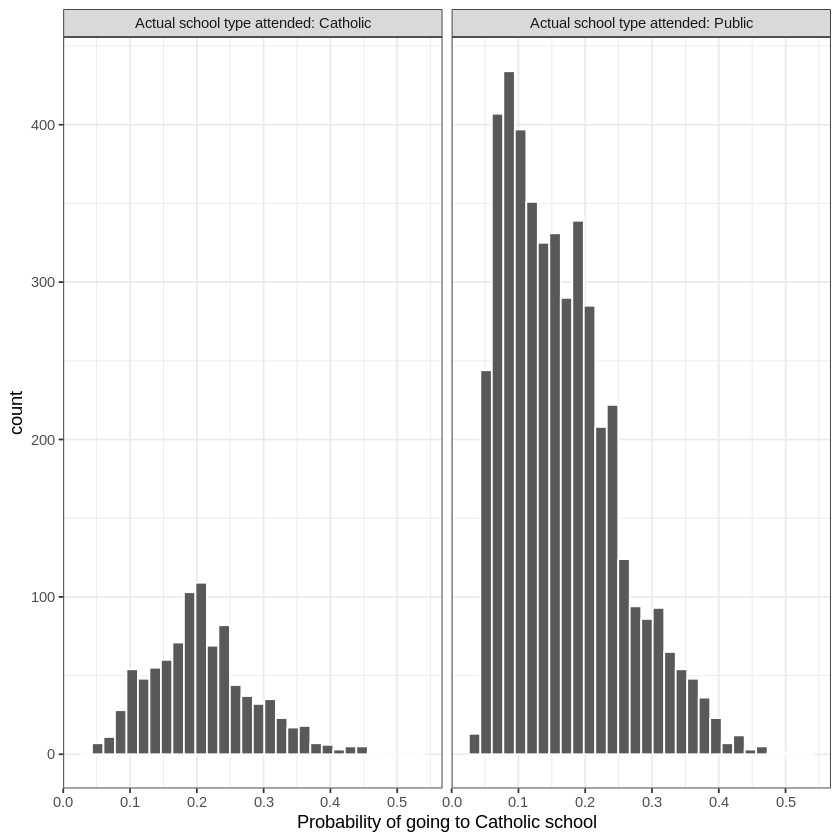

In [ ]:
labs <- paste("Actual school type attended:", c("Catholic", "Public"))

prs_df %>%
  mutate(catholic = ifelse(catholic == 1, labs[1], labs[2])) %>%
  ggplot(aes(x = pr_score)) +
  geom_histogram(color = "white") +
  facet_wrap(~catholic) +
  xlab("Probability of going to Catholic school") +
  theme_bw()

## 3) Matching Alogorithm
A simple method for estimating the treatment effect of Catholic schooling is to restrict the sample to observations within the region of common support, and then to divide the sample within the region of common support into 5 quintiles, based on the estimated propensity score. Within each of these 5 quintiles, we can then estimate the mean difference in student achievement by treatment status. Rubin and others have argued that this is sufficient to eliminate 95% of the bias due to confounding of treatment status with a covariate.  
However, most matching algorithms adopt slightly more complex methods. The method we use below is to find pairs of observations that have very similar propensity scores, but that differ in their treatment status. We use the package MatchIt for this. This package estimates the propensity score in the background and then matches observations based on the method of choice (“nearest” in this case.

In [ ]:
install.packages("MatchIt")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘chk’, ‘Rcpp’, ‘RcppProgress’




In [ ]:
library(MatchIt)

In [ ]:
ecls_nomiss <- ecls %>%  # MatchIt does not allow missing values
  select(c5r2mtsc_std, catholic, one_of(ecls_cov)) %>%
  na.omit()

mod_match <- matchit(catholic ~ race_white + w3income + p5hmage + p5numpla + w3momed_hsb,
                     method = "nearest", data = ecls_nomiss)

In [ ]:
summary(mod_match)


Call:
matchit(formula = catholic ~ race_white + w3income + p5hmage + 
    p5numpla + w3momed_hsb, data = ecls_nomiss, method = "nearest")

Summary of Balance for All Data:
            Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance           0.2086        0.1636          0.5851     0.8523    0.1672
race_white         0.7667        0.6537          0.2671          .    0.1130
w3income       86180.6253    65393.9285          0.4744     1.0647    0.1011
p5hmage           39.7753       37.7946          0.4206     0.6679    0.0499
p5numpla           1.0731        1.1062         -0.1182     0.6323    0.0066
w3momed_hsb        0.2054        0.3923         -0.4627          .    0.1869
            eCDF Max
distance      0.2768
race_white    0.1130
w3income      0.2478
p5hmage       0.1734
p5numpla      0.0265
w3momed_hsb   0.1869

Summary of Balance for Matched Data:
            Means Treated Means Control Std. Mean Diff. Var. Ratio eCDF Mean
distance           0.2086 

To identify the units, use first mouse button; to stop, use second.


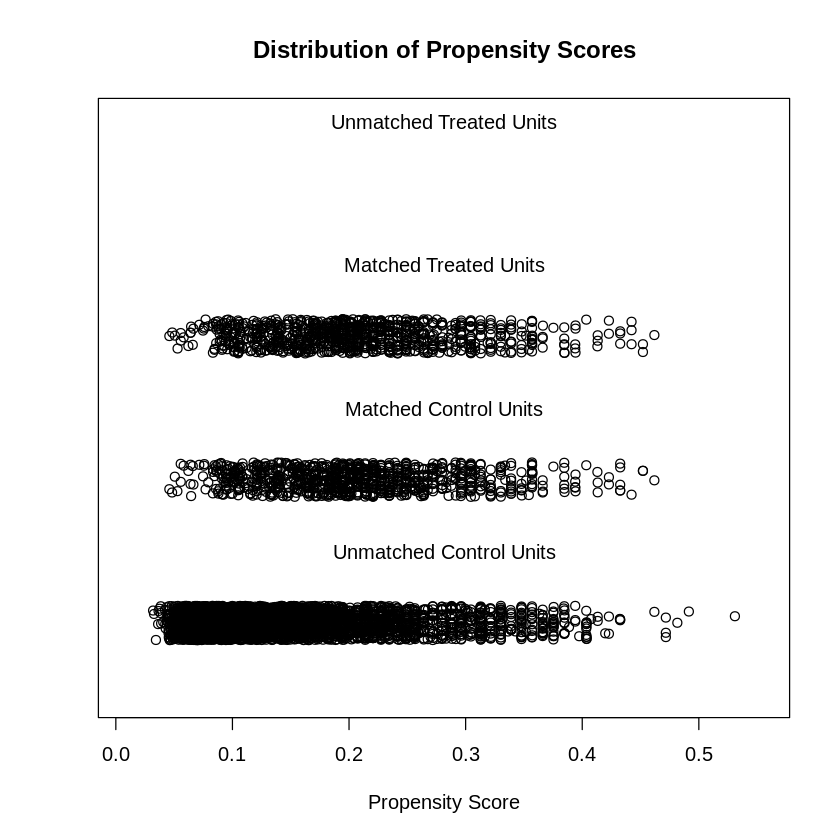

In [ ]:
plot(mod_match, type="jitter")

In [ ]:
dta_m <- match.data(mod_match)
dim(dta_m)

head(dta_m)

[1] 1860   10

c5r2mtsc_std,catholic,race_white,p5hmage,w3income,p5numpla,w3momed_hsb,distance,weights,subclass
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.4512779,1,1,38,87500.5,1,0,0.22060604,1,550
-0.4538946,0,1,38,37500.5,1,0,0.17087300,1,169
0.7474543,0,1,38,62500.5,1,0,0.19453691,1,544
-0.6117067,0,0,36,17500.5,1,1,0.06598773,1,595
1.4853522,1,1,41,150000.5,2,0,0.27737491,1,263
-0.5019691,1,1,35,87500.5,1,0,0.20088982,1,270


## 4) Examine covariate balance of matched sample  
1. visual inspection
2. t-tests of difference-in-means
3. computation of the average absolute standardized difference (“standardized imbalance”)


### 1) Visual inspection

In [ ]:
install.packages("gridExtra")

fn_bal <- function(dta, variable) {
  dta$variable <- dta[, variable]
  if (variable == 'w3income') dta$variable <- dta$variable / 10^3
  dta$catholic <- as.factor(dta$catholic)
  support <- c(min(dta$variable), max(dta$variable))
  ggplot(dta, aes(x = distance, y = variable, color = catholic)) +
    geom_point(alpha = 0.2, size = 1.3) +
    geom_smooth(method = "loess", se = F) +
    xlab("Propensity score") +
    ylab(variable) +
    theme_bw() +
    ylim(support)
}

library(gridExtra)
grid.arrange(
   fn_bal(dta_m, "w3income"),
   fn_bal(dta_m, "p5numpla") + theme(legend.position = "none"),
   fn_bal(dta_m, "p5hmage"),
   fn_bal(dta_m, "w3momed_hsb") + theme(legend.position = "none"),
   fn_bal(dta_m, "race_white"),
   nrow = 3, widths = c(1, 0.8)
)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



ERROR: ignored

### 2) Difference-in-means  
The means below indicate that we have attained a high degree of balance on the five covariates included in the model.

In [ ]:
dta_m %>%
  group_by(catholic) %>%
  select(one_of(ecls_cov)) %>%
  summarise_all(list(mean))

Adding missing grouping variables: `catholic`


catholic,race_white,p5hmage,w3income,p5numpla,w3momed_hsb
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0.7720430,39.63441,86008.58,1.052688,0.2043011
1,0.7666667,39.77527,86180.63,1.073118,0.2053763


In [ ]:
t.test(race_white ~ catholic, data = dta_m)


	Welch Two Sample t-test

data:  race_white by catholic
t = 0.27508, df = 1857.9, p-value = 0.7833
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.03295596  0.04370865
sample estimates:
mean in group 0 mean in group 1 
      0.7720430       0.7666667 


In [ ]:
t.test(p5hmage ~ catholic, data = dta_m)


	Welch Two Sample t-test

data:  p5hmage by catholic
t = -0.6504, df = 1857.5, p-value = 0.5155
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.5656133  0.2838929
sample estimates:
mean in group 0 mean in group 1 
       39.63441        39.77527 


In [ ]:
t.test(w3income ~ catholic, data = dta_m)


	Welch Two Sample t-test

data:  w3income by catholic
t = -0.084383, df = 1857.9, p-value = 0.9328
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -4170.670  3826.585
sample estimates:
mean in group 0 mean in group 1 
       86008.58        86180.63 


In [ ]:
t.test(p5numpla ~ catholic, data = dta_m)


	Welch Two Sample t-test

data:  p5numpla by catholic
t = -1.6563, df = 1835.3, p-value = 0.09783
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.04462141  0.00376120
sample estimates:
mean in group 0 mean in group 1 
       1.052688        1.073118 


In [ ]:
t.test(w3momed_hsb ~ catholic, data = dta_m)


	Welch Two Sample t-test

data:  w3momed_hsb by catholic
t = -0.057422, df = 1858, p-value = 0.9542
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.03780109  0.03565055
sample estimates:
mean in group 0 mean in group 1 
      0.2043011       0.2053763 


### 4.3) Average absolute standardized difference

As a measure of the average imbalance, we can calculate the following:

∣∣βσ∣∣¯=1k∑x|βx|σx

where βx

is the difference between the covariate means in the treated and control groups in the matched sample. An average absolute standardized difference that is close to 0 is preferable, since that indicates small differences between the control and treatment groups in the matched sample.

Try to implement a function that calculates the absolute standardized difference for any covariate in the matched sample. Then take the average for all the covariates.

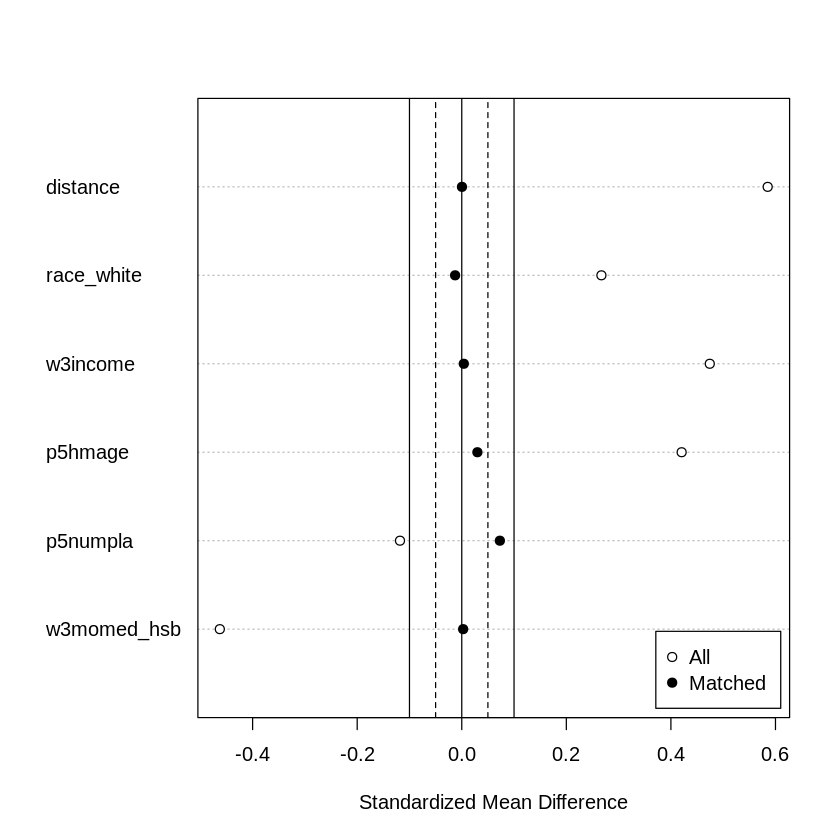

In [ ]:
plot(summary(mod_match), abs = FALSE)

Good matched data, the absolute standardized meand difference should between -0.1 ~ 0.1

## 5) Estimating treatment effect

In [ ]:
t.test(c5r2mtsc_std ~ catholic, data = dta_m)


	Welch Two Sample t-test

data:  c5r2mtsc_std by catholic
t = 4.4425, df = 1847.3, p-value = 9.417e-06
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 0.1026983 0.2650474
sample estimates:
mean in group 0 mean in group 1 
      0.4035580       0.2196851 


From matched paried show if every factor are the same for both  catholic student vs non-catholic student. Going to in catholic school yield negative impact on math test score

In [ ]:
lm_treat1 <- lm(c5r2mtsc_std ~ catholic, data = dta_m)
summary(lm_treat1)


Call:
lm(formula = c5r2mtsc_std ~ catholic, data = dta_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.4955 -0.5675  0.0332  0.6066  3.0301 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.40356    0.02927  13.789  < 2e-16 ***
catholic    -0.18387    0.04139  -4.443 9.41e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8925 on 1858 degrees of freedom
Multiple R-squared:  0.01051,	Adjusted R-squared:  0.009978 
F-statistic: 19.74 on 1 and 1858 DF,  p-value: 9.414e-06


In [ ]:
lm_treat2 <- lm(c5r2mtsc_std ~ catholic + race_white + p5hmage +
                  I(w3income / 10^3) + p5numpla + w3momed_hsb, data = dta_m)
summary(lm_treat2)


Call:
lm(formula = c5r2mtsc_std ~ catholic + race_white + p5hmage + 
    I(w3income/10^3) + p5numpla + w3momed_hsb, data = dta_m)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.7095 -0.5353  0.0240  0.6104  2.8349 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)      -0.6936331  0.1947415  -3.562 0.000378 ***
catholic         -0.1826328  0.0393196  -4.645 3.64e-06 ***
race_white        0.2682888  0.0468558   5.726 1.20e-08 ***
p5hmage           0.0214028  0.0042952   4.983 6.84e-07 ***
I(w3income/10^3)  0.0030883  0.0004647   6.645 3.96e-11 ***
p5numpla         -0.1454435  0.0740612  -1.964 0.049699 *  
w3momed_hsb      -0.3462700  0.0497587  -6.959 4.74e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8471 on 1853 degrees of freedom
Multiple R-squared:  0.111,	Adjusted R-squared:  0.1081 
F-statistic: 38.57 on 6 and 1853 DF,  p-value: < 2.2e-16


# Analysis from Rpub
from https://rpubs.com/metricsdawg/1037525

In [ ]:
library(tidyverse)
ecls <- read_csv("http://www.mfilipski.com/files/ecls.csv")
spec(ecls)

Rows: 5429 Columns: 23
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): childid, race, w3daded, w3momed, w3inccat
dbl (18): catholic, race_white, race_black, race_hispanic, race_asian, p5num...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


cols(
  childid = col_character(),
  catholic = col_double(),
  race = col_character(),
  race_white = col_double(),
  race_black = col_double(),
  race_hispanic = col_double(),
  race_asian = col_double(),
  p5numpla = col_double(),
  p5hmage = col_double(),
  p5hdage = col_double(),
  w3daded = col_character(),
  w3momed = col_character(),
  w3daded_hsb = col_double(),
  w3momed_hsb = col_double(),
  w3momscr = col_double(),
  w3dadscr = col_double(),
  w3inccat = col_character(),
  w3income = col_double(),
  w3povrty = col_double(),
  p5fstamp = col_double(),
  c5r2mtsc = col_double(),
  c5r2mtsc_std = col_double(),
  w3income_1k = col_double()
)

In [ ]:
ecls %>%
  group_by(catholic) %>%
  summarise_at(vars(c5r2mtsc_std), list(n=length, min=min, mean=mean, max=max, sd=sd)) %>%
  mutate(std_err = sd/sqrt(n))

catholic,n,min,mean,max,sd,std_err
<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,4499,-3.103553,0.1631279,3.433658,0.9736968,0.01451663
1,930,-2.592234,0.2196851,3.055238,0.8579016,0.02813170


Comparing average score by group, chatholic group  have higher mean (0.21).


In [ ]:
t.test(c5r2mtsc_std ~ catholic, data = ecls)


	Welch Two Sample t-test

data:  c5r2mtsc_std by catholic
t = -1.7866, df = 1468.1, p-value = 0.07421
alternative hypothesis: true difference in means between group 0 and group 1 is not equal to 0
95 percent confidence interval:
 -0.118653665  0.005539377
sample estimates:
mean in group 0 mean in group 1 
      0.1631279       0.2196851 


Anyway, the t-test comparing mean between 2 group show p-value > 0.05 / could reject alternative hypothesis $H_0$ = 0 since the confidence interval have 0

In [ ]:
reg_model <- lm(c5r2mtsc_std ~ catholic, data = ecls)
summary(reg_model)


Call:
lm(formula = c5r2mtsc_std ~ catholic, data = ecls)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.2667 -0.6082  0.0538  0.6292  3.2705 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.16313    0.01424  11.459   <2e-16 ***
catholic     0.05656    0.03440   1.644      0.1    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.9549 on 5427 degrees of freedom
Multiple R-squared:  0.000498,	Adjusted R-squared:  0.0003138 
F-statistic: 2.704 on 1 and 5427 DF,  p-value: 0.1002


From simple regression analysis show low p-value on coefficient of independent variable `catholic`

In [ ]:
reg_model2 <- lm(ecls$c5r2mtsc_std ~ catholic + w3income_1k + p5numpla + w3momed_hsb, data = ecls)
summary(reg_model2)


Call:
lm(formula = ecls$c5r2mtsc_std ~ catholic + w3income_1k + p5numpla + 
    w3momed_hsb, data = ecls)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.3922 -0.5696  0.0372  0.5986  3.2572 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.0733290  0.0491661   1.491 0.135900    
catholic    -0.1273899  0.0328888  -3.873 0.000109 ***
w3income_1k  0.0053247  0.0003026  17.595  < 2e-16 ***
p5numpla    -0.1009432  0.0355779  -2.837 0.004567 ** 
w3momed_hsb -0.3740355  0.0271962 -13.753  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.8941 on 5424 degrees of freedom
Multiple R-squared:  0.1242,	Adjusted R-squared:  0.1235 
F-statistic: 192.3 on 4 and 5424 DF,  p-value: < 2.2e-16


When include the other independent variable `w3income_1k`, `w3income_1k`, `w3momed_hsb`. The coefficient for catholic became significant.